In [17]:
# Load libraries
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import math
import seaborn as sn

In [3]:
# load dataset
data = pd.read_csv("Kaggle/Dropout_Academic Success - Sheet1.csv")


In [4]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
target_labels_before = data['Target'] 

In [6]:
Y = data["Target"].map({"Graduate" :1, "Dropout" :0, "Enrolled" :2}) #mapping numbers
# data.Target = data.Target.replace({'Dropout':0,'Graduate':2,"Enrolled":2})


In [7]:
X = data[data.columns[:-1]]
Y = data.Target


In [41]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test

In [9]:
logreg = LogisticRegressionCV(cv=10,solver='lbfgs', max_iter=10000,random_state=0)
logreg.fit(X, Y)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=0)

In [44]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
scores

array([0.76836158, 0.75988701, 0.78813559, 0.73446328, 0.74858757,
       0.74293785, 0.74293785, 0.77118644, 0.75141243, 0.77053824])

In [45]:
pd.DataFrame(scores,columns=['Accuracy'])

,Accuracy
0,0.768362
1,0.759887
2,0.788136
3,0.734463
4,0.748588
5,0.742938
6,0.742938
7,0.771186
8,0.751412
9,0.770538


In [11]:
y_pred = logreg.predict(X_test)


In [13]:
logreg.score(X_test,y_test)

0.7751412429378531

In [14]:
c = confusion_matrix(y_test,y_pred)

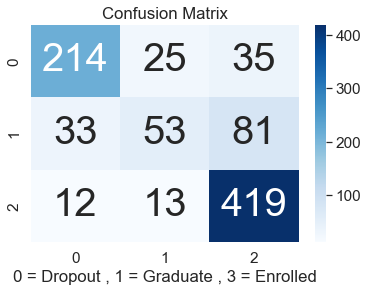

In [18]:
sn.set(font_scale=1.4) # for label size
s = sn.heatmap(c, annot=True, cmap='Blues',annot_kws={"size": 40},fmt='g') 
s.set_xlabel('0 = Dropout , 1 = Graduate , 3 = Enrolled')
s.set_title("Confusion Matrix")
plt.show()


In [19]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.83      0.78      0.80       274
    Enrolled       0.58      0.32      0.41       167
    Graduate       0.78      0.94      0.86       444

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885



## Gaussian Naive Bayes

In [33]:
def confusionMatrix(y_test,y_pred):
    c = confusion_matrix(y_test,y_pred)
    sn.set(font_scale=1.4) # for label size
    s = sn.heatmap(c, annot=True, cmap='Blues',annot_kws={"size": 40},fmt='g')
    s.set_title("Confusion Matrix")
    s.set_xlabel('0 = Dropout , 1 = Graduate , 3 = Enrolled')
    return s

In [34]:

gnb  = GaussianNB()

In [35]:
y_pred = gnb.fit(X_train,y_train).predict(X_test)

In [36]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 885 points : 275


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='0 = Dropout , 1 = Graduate , 3 = Enrolled'>

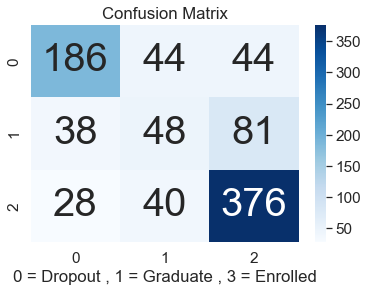

In [37]:
confusionMatrix(y_test,y_pred)

In [25]:
gnb.score(X_test,y_test)

0.6892655367231638

In [139]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.6892655367231638

In [178]:
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring="accuracy")
print('Cross-validation scores:'scores)
meanScore = scores.mean()
print(meanScore * 100)
# scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')



[0.70903955 0.69774011 0.71468927 0.68079096 0.65819209 0.66949153
 0.6779661  0.69774011 0.70338983 0.68555241]
68.94591955954611


In [102]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       274
           1       0.75      0.85      0.80       444
           2       0.36      0.29      0.32       167

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.61       885
weighted avg       0.67      0.69      0.68       885



#### Userdefine cross validation 


In [172]:

# def cross(df,fold=3,classification=gnb):
#     result= []
#     r = [1,2,3,4,5,6,7,8,9]
#     l = len(df)
#     test_len = math.ceil(l/fold)
#     print(test_len)
#     temp = 0
#     for i in range(fold):
#         test = df[temp:test_len]
#         train = pd.concat( [df[0:temp],df[test_len:temp]])
#         return df[test_len:temp-1]
#         X_test = test[test.columns[:-1]]
#         y_test = test.Target
#         X_train = train[train.columns[:-1]]
#         y_train = train.Target
# #         classification.fit(train,test)
#         y_pred = gnb.fit(X_train,y_train).predict(X_test)
        
#         temp= test_len
#         test_len += test_len 
        
# cross(data.head(9),3,gnb)

3


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000,0,15.5,2.8,-4.06,0
